In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

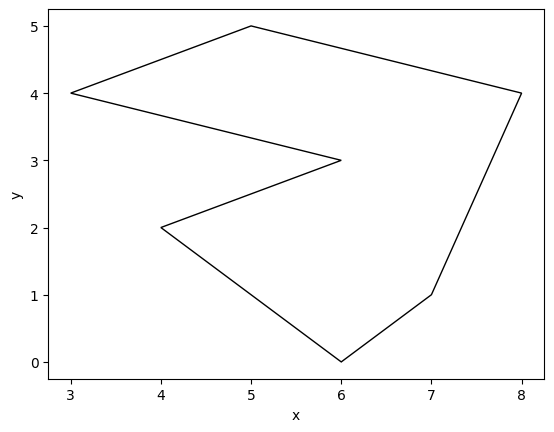

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

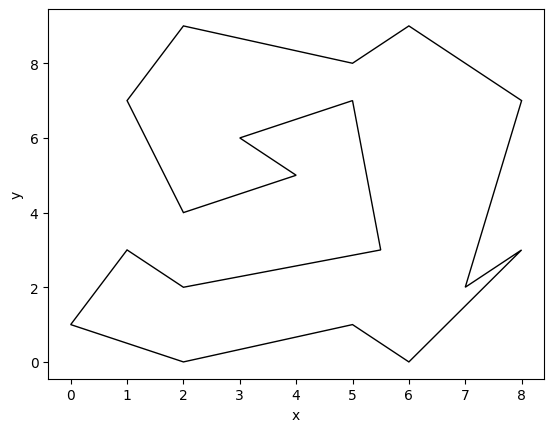

In [7]:
polygon = polygon_example_2
draw_polygon(polygon)


In [8]:
import matplotlib.pyplot as plt
%matplotlib tk

points = []

def onclick(event):
    x, y = event.xdata, event.ydata
    
    if x is not None and y is not None:
        if event.button == 1:
            points.append((x, y))
            plt.plot(x, y, "go")
            if len(points) > 1:
                plt.plot([points[-2][0], points[-1][0]], [points[-2][1], points[-1][1]], 'b-')
            
            plt.draw()
        elif event.button == 3:
            connect_points()
            plt.close()


def connect_points():
    if len(points) > 1:
        x_coords, y_coords = zip(*points)
        plt.plot(x_coords + (x_coords[0],), y_coords + (y_coords[0],), 'b-')
        plt.draw()


fig, ax = plt.subplots()
ax.set_title("Left click to add points, right click to close the plot")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [15]:
connect_points()
for x in points:
    print('(', end='')
    print(x[0],',', x[1], end = '), ')

(2.4999999999999996 , 5.757575757575758), (2.9999999999999996 , 1.1255411255411258), (5.935483870967742 , 0.7792207792207797), (7.903225806451612 , 1.9913419913419916), (8.725806451612902 , 5.216450216450217), (8.241935483870968 , 7.2727272727272725), (7.306451612903226 , 8.528138528138527), (5.67741935483871 , 8.67965367965368), (3.8064516129032255 , 8.268398268398268), 

In [10]:
examplePolygon1 = [(3.286290322580646, 8.630655797150109),(1.364247311827957, 7.717401522985804),(3.084677419354839, 7.247344175989471),(1.310483870967742, 5.70287003585866),(3.118279569892474, 5.192522059119784),(0.450268817204301, 3.392873930619536),(3.239247311827957, 2.74822385473885),(0.571236559139785, 0.9351455163244202),(4.435483870967743, 0.7605527874400677),(7.58736559139785, 1.5126445426342012),(5.006720430107528, 2.640782175425402),(7.47983870967742, 3.7017687586456978),(4.791666666666667, 4.897057441007803),(7.39247311827957, 6.052055493627365), (4.731182795698925, 7.153332706590203), (6.028225806451614, 8.53664432775084), (4.119623655913979, 9.852804899340574)]
examplePolygon2 = [(3.071236559139785 , 9.919955948911479), (2.842741935483871 , 9.181294403631528), (2.862903225806452 , 8.65751621697847), (2.862903225806452 , 8.644086007064288), (2.876344086021506 , 8.053156770840326), (2.883064516129033 , 8.053156770840326), (2.956989247311828 , 7.4219369048738235), (2.99731182795699 , 6.763856619078957), (2.99731182795699 , 6.763856619078957), (3.057795698924732 , 6.347520111739346), (3.091397849462366 , 5.8237419250862885), (3.178763440860215 , 5.259673108690689), (3.259408602150538 , 4.749325131951812), (3.326612903225807 , 4.185256315556212), (3.373655913978495 , 3.8226406478733264), (3.467741935483871 , 3.339153090962812), (3.588709677419355 , 3.0168280530224685), (3.595430107526882 , 3.0033978431082877), (3.649193548387097 , 2.74822385473885), (3.83736559139785 , 2.2244456680857922), (3.985215053763441 , 1.928981049973811), (4.153225806451613 , 1.620086221947649), (4.395161290322581 , 1.2306101344364013), (4.590053763440861 , 0.9754361460669629), (4.791666666666667 , 0.8142736270967916), (5.107526881720431 , 0.8008434171826109), (5.383064516129033 , 0.9754361460669629), (5.591397849462366 , 1.2574705542647633), (5.745967741935485 , 1.5797955922051063), (6.001344086021506 , 2.1707248284290683), (6.075268817204302 , 2.74822385473885), (6.12231182795699 , 3.1645603620784595), (6.162634408602151 , 3.7151989685598785), (6.250000000000001 , 4.185256315556212), (6.323924731182797 , 4.655313662552546), (6.370967741935485 , 5.125371009548879), (6.40456989247312 , 5.729730455687022), (6.465053763440862 , 6.307229481996803), (6.518817204301076 , 6.68327535959387), (6.55241935483871 , 7.193623336332746), (6.572580645161292 , 7.636820263500717), (6.572580645161292 , 8.012866141097783), (6.586021505376346 , 8.603795377321745), (6.592741935483872 , 8.805248526034461), (6.586021505376346 , 9.20815482345989), (6.572580645161292 , 9.611061120885317), (6.491935483870968 , 9.839374689426394)]
examplePolygon3 = [(3.178763440860215 , 7.838273412213431), (2.889784946236559 , 7.408506694959642), (2.788978494623656 , 6.898158718220766), (2.775537634408602 , 6.1729273828549935), (2.916666666666667 , 5.4745564673175835), (3.165322580645162 , 5.13880121946306), (3.521505376344086 , 4.991068910407069), (3.931451612903226 , 5.058219959977974), (4.119623655913979 , 5.3671147880041365), (4.26747311827957 , 5.729730455687022), (4.368279569892474 , 6.280369062168441), (4.327956989247312 , 6.736996199250593), (4.220430107526882 , 7.0727514471051185), (4.133064516129033 , 7.39507648504546), (3.998655913978495 , 7.583099423843994), (3.817204301075269 , 7.838273412213431), (3.676075268817205 , 7.932284881612699), (3.440860215053764 , 7.918854671698518), (3.293010752688172 , 7.905424461784338)]
examplePolygon4 = [(4.368279569892474 , 9.731933010112947), (1.2231182795698925 , 7.301065015646194), (3.481182795698925 , 8.442632858351574), (1.3844086021505375 , 6.334089901825165), (3.360215053763441 , 7.690541103157442), (1.875 , 4.910487650921984), (3.245967741935484 , 6.69670556950805), (2.28494623655914 , 3.392873930619536), (3.353494623655914 , 5.931183604399736), (3.259408602150538 , 2.788514484481393), (3.608870967741936 , 5.689439825944479), (3.931451612903226 , 2.681072805167945), (4.045698924731183 , 6.387810741481889), (4.045698924731183 , 6.387810741481889), (4.596774193548388 , 2.8690957439664784), (4.401881720430108 , 7.596529633758174), (4.885752688172044 , 3.298862461220269), (4.455645161290323 , 8.066586980754508), (5.611559139784947 , 3.9569427470151357), (4.381720430107527 , 8.67094642689265), (5.900537634408603 , 6.280369062168441), (4.35483870967742 , 9.141003773888984), (6.525537634408604 , 8.630655797150109), (4.341397849462366 , 9.382747552344242), (6.53225806451613 , 9.423038182086785)]
examplePolygon5 = [(4.241935483870968 , 9.437229437229437), (1.870967741935484 , 0.3679653679653683), (7.193548387096774 , 2.012987012987013), (3.9677419354838706 , 3.874458874458875), (6.516129032258064 , 4.675324675324676), (4.774193548387096 , 6.6017316017316015), (6.774193548387096 , 7.532467532467533)]
examplePolygon6 = [(5.516129032258064 , 9.783549783549782), (5.580645161290322 , 8.614718614718614), (5.258064516129032 , 7.662337662337662), (4.741935483870968 , 6.688311688311688), (4.016129032258064 , 5.714285714285714), (3.1612903225806455 , 4.978354978354979), (2.2580645161290325 , 4.2857142857142865), (1.1774193548387095 , 3.5930735930735933), (0.25806451612903225 , 3.4848484848484853), (8.596774193548386 , 0.23809523809523836)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [11]:
def is_y_monotonic(polygon):
    leftChain, rightChain = getPolygonChains(polygon)

    for i in range(len(leftChain)-1):
        if leftChain[i][0][1] < leftChain[i+1][0][1]:
            return False
    for i in range(len(rightChain)-1):
        if rightChain[i][0][1] < rightChain[i+1][0][1]:
            return False
            
    return True
        

In [12]:
def getPolygonChains(polygon):
    n=len(polygon)
    
    leftChain=[]
    rightChain=[]
    
    minVert = min(polygon, key = lambda x: x[1])
    maxVert = max(polygon, key = lambda x: x[1])
    minIndex = polygon.index(minVert)
    maxIndex = polygon.index(maxVert)

    current = maxIndex
    while current != minIndex:
        leftChain.append((polygon[current], current))
        current = (current + 1) % n
                     
    current = (maxIndex-1+n)%n
    while current != minIndex:
        rightChain.append((polygon[current], current))
        current = (current - 1 + n) % n
    rightChain.append((polygon[minIndex], minIndex))

    return leftChain, rightChain

Przeprowadź test poprawności powyższej funkcji.

In [13]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [16]:
print(is_y_monotonic(points))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

In [17]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [18]:
def mat_det(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-((b[0]-c[0])*(a[1]-c[1]))

In [19]:
def color_vertex(polygon):
    n = len(polygon)
    result = [-1]*n

    for i in range(n):
        prevVert = polygon[i-1]
        nextVert = polygon[(i+1)%n]
        
        if prevVert[1] < polygon[i][1] and nextVert[1] < polygon[i][1]:
            if mat_det(prevVert, polygon[i], nextVert) > 0:
                result[i] = 0
            else:
                result[i] = 3
        elif prevVert[1] > polygon[i][1] and nextVert[1] > polygon[i][1]:
            if mat_det(prevVert, polygon[i], nextVert) > 0:
                result[i] = 1
            else:
                result[i] = 2
        else:
            result[i] = 4

    return result

Przeprowadź test poprawności powyższej funkcji. 

In [20]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

In [21]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

In [22]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [24]:
def correct_triangle(a, b, c, n):
    if abs(c[1]-a[1]) in (1, n-1):
        return False
    if c[2]==1:
        return mat_det(c[0], b[0], a[0]) > 0
    else:
        return mat_det(a[0], b[0], c[0]) > 0

In [23]:
from collections import deque
def triangulation(polygon):
    n=len(polygon)
    
    leftChain, rightChain = getPolygonChains(polygon)
    
    monotonicOrder=[None for _ in range(n)]
    
    l = len(leftChain)
    r = len(rightChain)
    i = j = 0
    
    while i < l and j < r:
        if leftChain[i][0][1] > rightChain[j][0][1]:
            monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
            i += 1
        else:
            monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
            j += 1
    while i < l:
        monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
        i += 1
    while j < r:
        monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
        j += 1    
    
    Q = deque([monotonicOrder[0], monotonicOrder[1]])
    result=[]
    
    for i in range(2,n):
        current = monotonicOrder[i]
        if current[2] != Q[-1][2]:
            for j in range(len(Q)-1, -1, -1):
                if abs(current[1]-Q[j][1]) not in (1, n-1):
                    result.append((current[1], Q[j][1]))
            
            toRemain = Q.pop()
            Q.clear()
            Q.append(toRemain)
        else:
            last = len(Q)-1
            for j in range(len(Q)-2, -1, -1):
                if correct_triangle(Q[j], Q[last], current, n):
                    result.append((current[1], Q[j][1]))
                    for k in range(len(Q)-1, last-1, -1):
                        Q.pop()
                    last = j
        Q.append(current)

    return result

In [25]:
from collections import deque
def triangulation(polygon):
    n=len(polygon)
    
    leftChain, rightChain = getPolygonChains(polygon)
    
    monotonicOrder=[None for _ in range(n)]
    
    l = len(leftChain)
    r = len(rightChain)
    i = j = 0
    
    while i < l and j < r:
        if leftChain[i][0][1] > rightChain[j][0][1]:
            monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
            i += 1
        else:
            monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
            j += 1
    while i < l:
        monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
        i += 1
    while j < r:
        monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
        j += 1    
    
    Q = deque([monotonicOrder[0], monotonicOrder[1]])
    result=[]
    
    for i in range(2,n):
        current = monotonicOrder[i]
        if current[2] != Q[-1][2]:
            for j in range(len(Q)-1, -1, -1):
                if abs(current[1]-Q[j][1]) not in (1, n-1):
                    result.append((current[1], Q[j][1]))
            
            toRemain = Q.pop()
            Q.clear()
            Q.append(toRemain)
        else:
            last = len(Q)-1
            for j in range(len(Q)-2, -1, -1):
                if correct_triangle(Q[j], Q[last], current, n):
                    result.append((current[1], Q[j][1]))
                    for k in range(len(Q)-1, last-1, -1):
                        Q.pop()
                    last = j
        Q.append(current)

    polygon = []
    for x in monotonicOrder:
        polygon.append(x[0])

    return polygon, result

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [26]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: WRONG ANSWER
		Output:   ([(0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428), (0.030693547033494514, -0.0404187105216232)], [(0, 4), (0, 3), (0, 2)])
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: WRONG ANSWER
		Output:   ([(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (0.028586692194784838, 0.02911202851463769), (-0.042159275547150654, 0.0038362932205200373), (0.03235685348510742, 0.001140214789147484), (-0.02641330780521517, -0.029190667563793703), (0.027477821227042898, -0.029527677367715277), (0.0006431438076880541, -0.046041157759872144)], [(7, 1), (2, 7), (6, 2), (3, 6), (5, 3)])
		Expected: [[1, 7], [2, 7], [2, 6], [3, 6], [3, 5]]
	Test 3: WRONG ANSWER
		Output:   ([(0.002417337356075161, 0.04811376394010061), (0.0050786276786558004, 0

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [27]:
if is_y_monotonic(polygon):
    tri = triangulation(polygon)
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [28]:
def triangulation_draw(polygon):
    n=len(polygon)
    
    leftChain, rightChain= getPolygonChains(polygon)
    monotonicOrder=[None for _ in range(n)]
    
    l=len(leftChain)
    r=len(rightChain)
    
    i = j = 0
    
    while i<l and j<r:
        if leftChain[i][0][1] > rightChain[j][0][1]:
            monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
            i += 1
        else:
            monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
            j += 1
    while i < l:
        monotonicOrder[i+j] = (leftChain[i][0], leftChain[i][1], 0)
        i+=1
    while j < r:
        monotonicOrder[i+j] = (rightChain[j][0], rightChain[j][1], 1)
        j+=1    
        
    Q = deque([monotonicOrder[0], monotonicOrder[1]])
    
    vis=Visualizer()
    vis.add_line_segment([(polygon[i], polygon[(i+1)%n]) for i in range(n)], color="green")
    vis.add_point([Q[0][0], Q[1][0]],color="red")
    
    for i in range(2, n):
        current = monotonicOrder[i]
        
        vis.add_point(current[0],color="red")
        
        if current[2] != Q[-1][2]:
            for j in range(len(Q)-1, -1, -1):
                if abs(current[1] - Q[j][1]) not in (1, n-1):
                    vis.add_line_segment((polygon[current[1]], polygon[Q[j][1]]), color="red")
                if j != len(Q)-1: vis.add_point(Q[j][0], color="yellow")
            toRemain = Q.pop()
            Q.clear()
            Q.append(toRemain)
        else:
            last = len(Q)-1
            for j in range(len(Q)-2, -1, -1):
                if correct_triangle(Q[j], Q[last], current, n):
                    vis.add_line_segment((polygon[current[1]], polygon[Q[j][1]]), color="red")
                    for k in range(len(Q)-1, last-1, -1):
                        vis.add_point(Q[-1][0], color="yellow")
                        Q.pop()
                    last=j
        Q.append(current)
        
    return vis

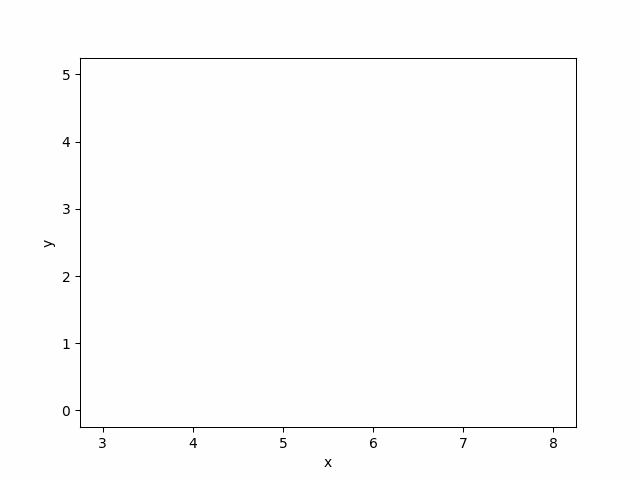

In [29]:
triang_vis=triangulation_draw(polygon_example_1)
triang_vis.show_gif()

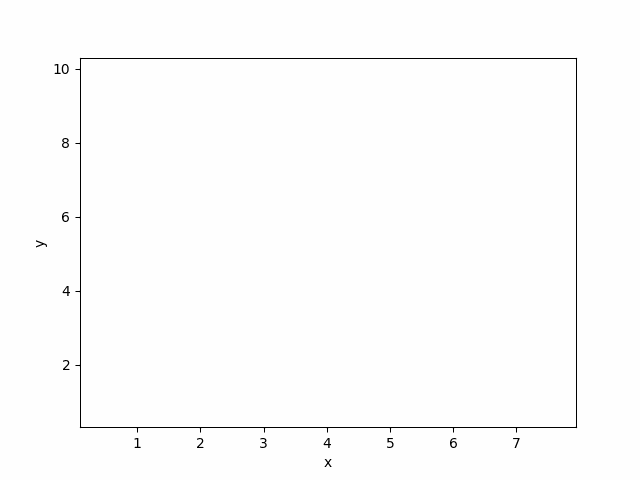

In [31]:
triang_vis=triangulation_draw(examplePolygon1)
triang_vis.show_gif()

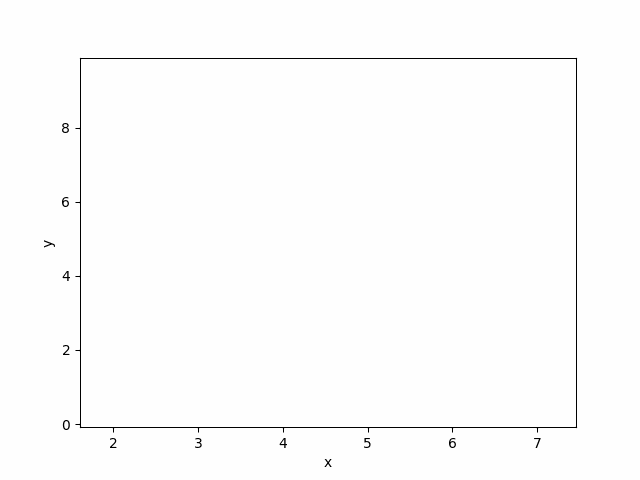

In [30]:
if is_y_monotonic(examplePolygon5):
    triang_vis=triangulation_draw(examplePolygon5)
triang_vis.show_gif()

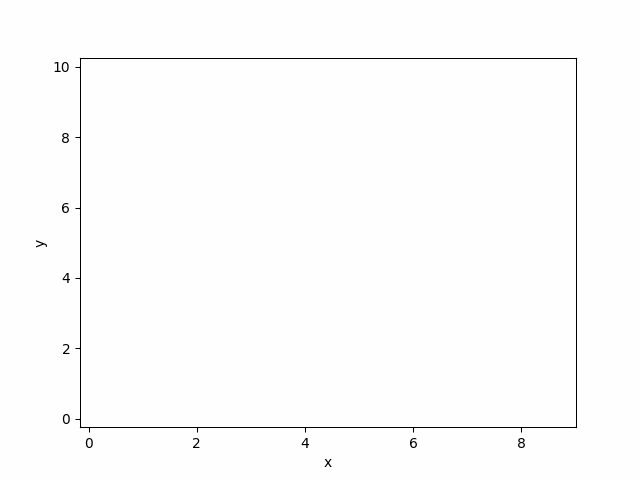

In [32]:
triang_vis=triangulation_draw(examplePolygon6)
triang_vis.show_gif()

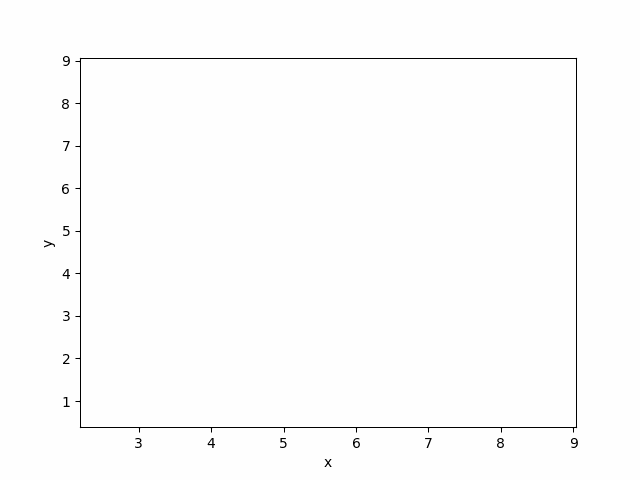

In [33]:
if is_y_monotonic(points):
    triang_vis=triangulation_draw(points)
triang_vis.show_gif()